In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
import math

from datetime import datetime

## Data

In [10]:
STOCK_PRICES_DATE_COL = 'Date'
STOCK_PRICES_HIGH_COL = 'High'
STOCK_PRICES_LOW_COL = 'Low'
STOCK_PRICES_AVG_COL = 'Avg'

STOCK_PRICES = pd.read_pickle('spx_index_prices.pkl')
STOCK_PRICES

,Open,High,Low,Close,Adj Close,Volume,Avg
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,1458.179993
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,1426.325012
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,1395.475037
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1402.000000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1421.099976
...,...,...,...,...,...,...,...
2020-03-16,2508.590088,2562.979980,2380.939941,2386.129883,2386.129883,7781540000,2471.959961
2020-03-17,2425.659912,2553.929932,2367.040039,2529.189941,2529.189941,8358500000,2460.484986
2020-03-18,2436.500000,2453.570068,2280.520020,2398.100098,2398.100098,8755780000,2367.045044


In [11]:
OPTION_PRICES_DATE_COL = 'date'
OPTION_PRICES_EXPIRATION_COL = 'exdate'
OPTION_PRICES_MATURITY_COL = 'maturity'
OPTION_PRICES_STRIKE_COL = 'strike_price'
OPTION_PRICES_BID_COL = 'best_bid'
OPTION_PRICES_OFFER_COL = 'best_offer'
OPTION_PRICES_SPREAD_COL = 'spread'
OPTION_PRICES_AVG_COL = 'avg'
OPTION_PRICES_ID_COL = 'optionid'
OPTION_PRICES_OTM_RANGE = 'otm_range'

OPTION_PRICES = pd.read_pickle('spx_option_prices.pkl')
OPTION_PRICES

,secid,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,...,vega,theta,optionid,forward_price,index_flag,issuer,exercise_style,maturity,spread,avg
0,108105,2000-01-03,2000-03-18,19991229.0,P,1410.0,36.750,38.750,0,1,...,235.99500,-119.41110,10120210,1470.521157,1,CBOE S&P 500 INDEX,E,75,2.0,37.750
1,108105,2000-01-03,2000-01-22,19991223.0,P,1505.0,55.250,57.250,0,50,...,100.89450,-172.62950,10000760,1458.650389,1,CBOE S&P 500 INDEX,E,19,2.0,56.250
2,108105,2000-01-03,2000-06-17,20000103.0,P,1350.0,40.750,42.750,290,14570,...,311.57080,-66.86736,10016917,1490.761534,1,CBOE S&P 500 INDEX,E,166,2.0,41.750
3,108105,2000-01-03,2000-01-22,20000103.0,P,1500.0,51.625,53.625,57,505,...,105.71350,-186.79210,10149633,1458.650389,1,CBOE S&P 500 INDEX,E,19,2.0,52.625
4,108105,2000-01-03,2000-01-22,NaN,P,1540.0,84.875,86.875,0,0,...,68.56206,-96.37443,10056576,1458.650389,1,CBOE S&P 500 INDEX,E,19,2.0,85.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8462523,108105,2019-06-28,2020-06-30,NaN,P,3800.0,824.100,848.000,0,0,...,NaN,NaN,129500433,2942.162769,1,CBOE S&P 500 INDEX,E,368,23.9,836.050
8462524,108105,2019-06-28,2020-06-30,NaN,P,3900.0,921.200,945.200,0,0,...,NaN,NaN,129500434,2942.162769,1,CBOE S&P 500 INDEX,E,368,24.0,933.200
8462525,108105,2019-06-28,2020-06-30,NaN,P,4000.0,1018.700,1042.500,0,0,...,NaN,NaN,129500435,2942.162769,1,CBOE S&P 500 INDEX,E,368,23.8,1030.600
8462526,108105,2019-06-28,2020-06-30,NaN,P,4100.0,1116.100,1140.000,0,0,...,NaN,NaN,129500436,2942.162769,1,CBOE S&P 500 INDEX,E,368,23.9,1128.050


## Algorithm

In [12]:
## Stocks: Sell

def get_stock_price(date):
    return STOCK_PRICES.loc[date][STOCK_PRICES_AVG_COL]

In [13]:
## Options: sell

def get_option_row(date, option_id):
    options_for_date = OPTION_PRICES[OPTION_PRICES[OPTION_PRICES_DATE_COL] == date]
    options_with_id = options_for_date[options_for_date[OPTION_PRICES_ID_COL] == option_id]
    if (options_with_id.shape[0] != 1):
        raise SystemExit("Uh oh, expected to find one option row date = {} option_id = {}".format(date, option_id))

    return options_with_id.iloc[0]

def get_option_sell_price(row):
    return row[OPTION_PRICES_BID_COL]

def liquidate_option(portfolio_row):
    option_id = portfolio_row[PORTFOLIO_OPTION_ID]
    if not option_id:
        return 0

    return (
        portfolio_row[PORTFOLIO_OPTION_QUANTITY] * 
        get_option_sell_price(
            get_option_row(portfolio_row[PORTFOLIO_DATE], option_id)
        )
    )

In [14]:
## Options: Buy

def get_option_buy_price(row):
    return row[OPTION_PRICES_OFFER_COL]
    
def options_for_otm_range(date, options, otm_range):
  current_stock_price = get_stock_price(date)
  min_strike = (1 - otm_range[1]) * current_stock_price
  max_strike = (1 - otm_range[0]) * current_stock_price
  
  return options[
    options[OPTION_PRICES_STRIKE_COL].between(min_strike, max_strike)
  ]

def find_potential_option_rows_to_buy(date, otm_range, maturity_range):
  options_on_this_date = OPTION_PRICES[OPTION_PRICES[OPTION_PRICES_DATE_COL] == date]
  options_within_expiration_range = options_on_this_date[
    options_on_this_date[OPTION_PRICES_MATURITY_COL]
      .between(maturity_range[0], maturity_range[1])
  ]
  options_within_otm_range = options_for_otm_range(
    date,
    options_within_expiration_range,
    otm_range
  )
  options_sorted_by_lowest_price_at_highest_strike = options_within_otm_range.sort_values(
    by=[OPTION_PRICES_OFFER_COL, OPTION_PRICES_STRIKE_COL], 
    ascending=[True, False]
  )
  
  return options_sorted_by_lowest_price_at_highest_strike

def get_option_row_to_buy(date, otm_range, maturity_range):
  best_option_rows = find_potential_option_rows_to_buy(date, otm_range, maturity_range)
  if best_option_rows.empty:
    raise SystemExit("wasn't able to find an option for {}".format(date))
  
  return best_option_rows.iloc[0]

In [15]:
## Purchase

def purchase(cash_available, price_per_item):
  quantity = cash_available // price_per_item
  return (quantity, quantity * price_per_item)

In [16]:
## give an option row, decides when to next schedule a trade 

def get_next_trading_date(option_row):
    option_rows_with_this_id = OPTION_PRICES[
       OPTION_PRICES[OPTION_PRICES_ID_COL] == option_row[OPTION_PRICES_ID_COL]]
    start_date = option_row[OPTION_PRICES_DATE_COL]
    end_date = option_row[OPTION_PRICES_EXPIRATION_COL]
    available_days = pd.bdate_range(start=start_date, end=end_date).intersection(
       option_rows_with_this_id[OPTION_PRICES_DATE_COL]
    )
    mid_point = available_days[len(available_days) // 2]
    options_to_mid_point = option_rows_with_this_id[option_rows_with_this_id[OPTION_PRICES_DATE_COL].between(start_date, mid_point)]
    for i, row in options_to_mid_point.iterrows():
        if get_option_sell_price(row) / get_option_buy_price(option_row) > 15:
            return row[OPTION_PRICES_DATE_COL]

    return mid_point

## Explore

In [17]:
OPTION_PURCHASES_DATE = 'option_purchases_date'
OPTION_PURCHASES_ID = 'option_purchases_id'

def option_purchases(start_date, otm_range, maturity_range):
    df = pd.DataFrame(columns=[OPTION_PURCHASES_DATE, OPTION_PURCHASES_ID])
    
    last_possible_date = OPTION_PRICES.iloc[len(OPTION_PRICES) - 1][OPTION_PRICES_DATE_COL]
    date = start_date
    while True:
        best_option_to_buy = get_option_row_to_buy(date, otm_range, maturity_range)
        df.loc[date] = pd.Series({
            OPTION_PURCHASES_DATE: date,
            OPTION_PURCHASES_ID: best_option_to_buy[OPTION_PRICES_ID_COL]
        })

        next_date = get_next_trading_date(best_option_to_buy)
        if next_date >= last_possible_date:
           return df

        date = next_date

    return assoc_option_rows(df)

In [18]:
def assoc_option_rows(purchases):
    def f(p):
        return pd.concat([p, get_option_row(p[OPTION_PURCHASES_DATE], p[OPTION_PURCHASES_ID])])

    return purchases.apply(f, axis=1)

In [19]:
OPTION_PROFITS_DATE = 'option_profits_date'
OPTION_PROFITS_ID = 'option_profits_id'
OPTION_PROFITS_QUANTITY = 'option_profits_quantity'
OPTION_PROFITS_BUY_PRICE = 'option_profits_buy_price'
OPTION_PROFITS_SELL_PRICE = 'option_profits_sell_price'
OPTION_PROFITS_BUY_AMT = 'option_profits_buy_amt'
OPTION_PROFITS_SELL_AMT = 'option_profits_sell_amt'
OPTION_PROFITS_GROWTH = 'option_profits_sell_growth'

def option_profits(rows):
    profits = pd.DataFrame(
        columns=[
            OPTION_PROFITS_DATE,
            OPTION_PROFITS_ID,
            OPTION_PROFITS_BUY_PRICE,
            OPTION_PROFITS_SELL_PRICE,
            OPTION_PROFITS_GROWTH,
        ]
    )
    profits.index = profits[OPTION_PROFITS_DATE]
    
    row_iterator = rows.iterrows()
    _, row = next(row_iterator)
    for i, next_row in row_iterator:
        id = row[OPTION_PRICES_ID_COL]

        buy_date = row[OPTION_PRICES_DATE_COL]
        buy_price = get_option_buy_price(row)

        sell_date = next_row[OPTION_PRICES_DATE_COL]     
        option_at_sell_time = get_option_row(sell_date, id)
        sell_price = get_option_sell_price(option_at_sell_time)
        
        profits.loc[sell_date] = pd.Series({
            OPTION_PROFITS_DATE: sell_date,
            OPTION_PROFITS_ID: id,
            OPTION_PROFITS_BUY_PRICE: buy_price,
            OPTION_PROFITS_SELL_PRICE: sell_price,
            OPTION_PROFITS_GROWTH: sell_price / buy_price
        })
        row = next_row

    return profits

In [20]:
def analyze(start_date, otm_range, maturity_range):
    purchases = option_purchases(start_date, otm_range, maturity_range)
    prows = assoc_option_rows(purchases)
    profits = option_profits(prows)
    print("otm_range={}, maturity_range={}".format(otm_range, maturity_range))
    (STOCK_PRICES[STOCK_PRICES_AVG_COL] / 100).plot()
    profits[OPTION_PROFITS_GROWTH].plot()
    plt.show()
    
    return (prows, profits)

otm_range=(0.1, 0.2), maturity_range=(50, 75)


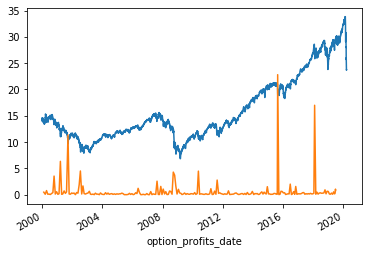

otm_range=(0.1, 0.3), maturity_range=(50, 75)


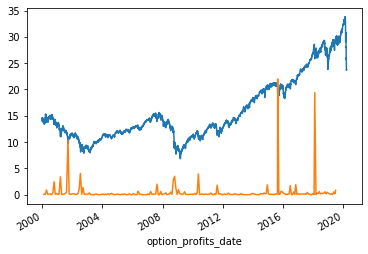

In [21]:
d1 = analyze(datetime(2000, 1, 10), (0.1, 0.2), (50, 75))
d2 = analyze(datetime(2000, 1, 10), (0.1, 0.3), (50, 75))

## Explore 2008

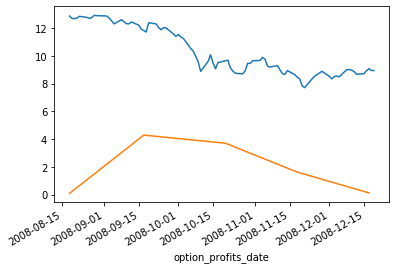

In [27]:
start_date = datetime(2008, 8, 18)
end_date = datetime(2008, 12, 20)

(rows, profits) = d1

(STOCK_PRICES[STOCK_PRICES_AVG_COL][start_date:end_date] / 100).plot()
profits[profits[OPTION_PROFITS_DATE].between(start_date, end_date)][OPTION_PROFITS_GROWTH].plot()


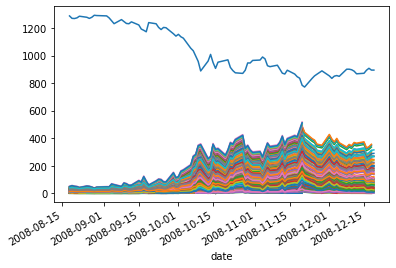

In [28]:
xs = OPTION_PRICES[OPTION_PRICES[OPTION_PRICES_DATE_COL].between(start_date, end_date)]

def f(x):
    first = x.iloc[0]
    best = max(x)
    return max(best, 1) / max(first, 1)

growths = xs.groupby(
    [OPTION_PRICES_ID_COL]
)[
    OPTION_PRICES_BID_COL
].agg(f).apply(g)


In [26]:
profits[profits[OPTION_PROFITS_DATE].between(start_date, end_date)]

,option_profits_date,option_profits_id,option_profits_buy_price,option_profits_sell_price,option_profits_sell_growth
option_profits_date,,,,,
2008-05-19,2008-05-19,32079126,2.45,0.10,0.040816
2008-06-18,2008-06-18,33217065,2.10,1.45,0.690476
2008-07-17,2008-07-17,33276896,3.10,1.85,0.596774
2008-08-18,2008-08-18,33170630,4.30,0.35,0.081395
2008-09-17,2008-09-17,33419304,2.80,12.00,4.285714
2008-10-20,2008-10-20,33586318,10.00,37.00,3.700000
2008-11-18,2008-11-18,33674177,19.10,30.90,1.617801
2008-12-17,2008-12-17,33674165,32.00,3.80,0.118750


Next thing to answer -- 

What is _common_ about the options that have the greatest returns?
Can start with a simple thing: 
    - _Just_ for the 2008 drawdown

In [31]:
def g(x):
    print(x)
    
growths.items(.apply(g)

3.4392956441149214
2.6938579654510555
84.1
17.5
39.1
86.22222222222221
42.396551724137936
13.061946902654869
7.738944365192583
23.527397260273972
4.9143075745983165
8.771186440677965
2.0413401253918497
2.2902990517870165
1.8733388022969646
6.860943168077387
6.10721649484536
9.97165991902834
5.463716814159292
17.393805309734514
4.445702864756829
4.050906963136336
12.78030303030303
9.689361702127659
16.63888888888889
6.196013289036545
5.12541993281075
4.294440093970242
3.344325897187197
3.627683615819209
7.628865979381444
2.3602736255383836
2.6762913057427014
3.0935402684563758
3.4822175732217575
1.8206537890044576
2.1246646026831786
1.950683509257657
32.71111111111111
3.9430086149768058
5.625508819538671
4.6875
3.0049317147192713
25.838709677419352
3.717988595127009
1.881177035023189
1.8083459787556906
1.7516229184307084
3.2033402922755743
2.9777082518576456
2.4647692732799116
2.8702959444647425
16.69672131147541
8.845208845208845
4.087898089171974
5.208413001912046
6.732035928143713
11

optionid
31799601    None
31799602    None
31800105    None
31800107    None
31800108    None
            ... 
46928002    None
46952155    None
46952198    None
46952527    None
52966590    None
Name: best_bid, Length: 1526, dtype: object